In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
img_filepath = "/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images"
csv_filepath = "/content/drive/MyDrive/BTT Skinterest 2A/Dataset/SCIN Working Merged Spreadsheet.csv"

In [5]:
csv_df = pd.read_csv(csv_filepath)
csv_df.head()

,case_id,source,release,year,age_group,sex_at_birth,fitzpatrick_skin_type,dermatologist_fitzpatrick_skin_type_label_1,dermatologist_fitzpatrick_skin_type_label_2,dermatologist_fitzpatrick_skin_type_label_3,...,related_category,condition_duration,image_1_path,image_2_path,image_3_path,image_1_shot_type,image_2_shot_type,image_3_shot_type,combined_race,race_ethnicity_two_or_more_after_mitigation
0,-1.262950e+18,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,FST3,0,0,...,NaN,NaN,dataset/images/-5949315841433628424.png,dataset/images/-8183947049312687778.png,dataset/images/4923188439600899486.png,AT_DISTANCE,CLOSE_UP,AT_AN_ANGLE,NaN,NaN
1,-1.489550e+18,SCIN,1.0.0,2023,AGE_UNKNOWN,OTHER_OR_UNSPECIFIED,NaN,FST2,0,0,...,NaN,NaN,dataset/images/325464533153467313.png,NaN,NaN,CLOSE_UP,NaN,NaN,NaN,NaN
2,-1.492320e+18,SCIN,1.0.0,2023,AGE_18_TO_29,FEMALE,NONE_IDENTIFIED,FST2,FST2,FST2,...,LOOKS_HEALTHY,ONE_TO_FOUR_WEEKS,dataset/images/-6837240536182868524.png,dataset/images/6395257111195214043.png,dataset/images/7877276387406078156.png,AT_DISTANCE,CLOSE_UP,AT_AN_ANGLE,HISPANIC_LATINO_OR_SPANISH_ORIGIN,NaN
3,-1.580900e+17,SCIN,1.0.0,2023,AGE_18_TO_29,FEMALE,FST3,FST3,0,0,...,RASH,ONE_TO_FOUR_WEEKS,dataset/images/2983323875335943836.png,NaN,NaN,CLOSE_UP,NaN,NaN,WHITE,NaN
4,-1.887630e+18,SCIN,1.0.0,2023,AGE_30_TO_39,MALE,FST3,FST2,0,0,...,OTHER_ISSUE_DESCRIPTION,LESS_THAN_ONE_WEEK,dataset/images/3104801012387799539.png,dataset/images/8660513260658813359.png,NaN,CLOSE_UP,AT_AN_ANGLE,NaN,WHITE,NaN


# Data Analysis and Data Cleaning

### **Method 1: Pillow Library**
https://pillow.readthedocs.io/en/stable/handbook/overview.html

This script scans a folder of images and reports which files are corrupted based on whether Pillow can successfully open and fully decode them.

- Uses Pillow (PIL) to open each file.
- `img.verify()` checks the image header for validity.
- `img.load()` forces the program to fully read pixel data,
  catching cases where an image looks valid but is actually truncated or broken.
- Corrupted files are collected into a list and printed at the end.
- The original dataset is not modified.


In [8]:
!pip install pillow

**Method 1: Pillow Library**
https://pillow.readthedocs.io/en/stable/handbook/overview.html

This script scans a folder of images and reports which files are corrupted based on whether Pillow can successfully open and fully decode them.

- Uses Pillow (PIL) to open each file.
- `img.verify()` checks the image header for validity.
- `img.load()` forces the program to fully read pixel data,
  catching cases where an image looks valid but is actually truncated or broken.
- Corrupted files are collected into a list and printed at the end.
- The original dataset is not modified.


In [12]:
import os
from PIL import Image

def check_corrupted_image(file_path):
    try:
        with Image.open(file_path) as img:
            img.verify()   # Header check
        with Image.open(file_path) as img:
            img.load()     # Force pixel data load
        return False
    except Exception as e:
        print(f"Corrupted image: {file_path} - {e}")
        return True

def list_corrupted_images(folder_path):
    corrupted_files = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        if os.path.isfile(file_path):
            try:
                if check_corrupted_image(file_path):
                    corrupted_files.append(file_path)
            except Exception as e:
                # Catch anything unexpected
                print(f"Error checking {file_path}: {e}")
                corrupted_files.append(file_path)
    return corrupted_files

# Example usage:
corrupted = list_corrupted_images(img_filepath)
print(f"Checked {len(os.listdir(img_filepath))} files")
print("Corrupted images:")
for f in corrupted:
    print(f)


Checked 770 files
Corrupted images:


There is nothing printed which means there are no corrupted files that exist within the dataset

### Method 2: Cleanvision library

https://github.com/cleanlab/cleanvision

This script uses the CleanVision library to automatically audit an image dataset. It scans all images in the given folder for common issues (e.g., blur, duplicates,brightness problems, resolution outliers) and produces a report.

In [6]:
!pip install cleanvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 16.8 MB/s eta 0:00:00


Reading images from /content/drive/MyDrive/BTT Skinterest 2A/Dataset/images
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/770 [00:00<?, ?it/s]

  0%|          | 0/770 [00:00<?, ?it/s]

Issue checks completed. 63 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | blurry           |           57 |
|  1 | odd_size         |            4 |
|  2 | low_information  |            1 |
|  3 | odd_aspect_ratio |            1 |
|  4 | dark             |            0 |
|  5 | light            |            0 |
|  6 | grayscale        |            0 |
|  7 | exact_duplicates |            0 |
|  8 | near_duplicates  |            0 | 

---------------------- blurry images -----------------------

Number of examples with this issue: 57
Examples representing most severe instances of this issue:



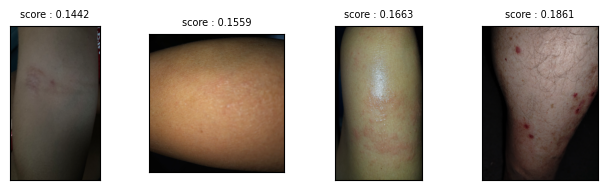

--------------------- odd_size images ----------------------

Number of examples with this issue: 4
Examples representing most severe instances of this issue:



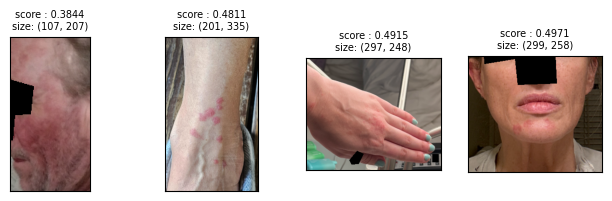

------------------ low_information images ------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



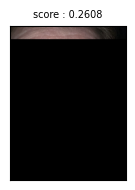

----------------- odd_aspect_ratio images ------------------

Number of examples with this issue: 1
Examples representing most severe instances of this issue:



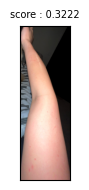

In [7]:

from cleanvision import Imagelab

# Specify path to folder containing the image files in your dataset
imagelab = Imagelab(data_path=img_filepath)

# Automatically check for a predefined list of issues within your dataset
imagelab.find_issues()

# Produce a neat report of the issues found in your dataset
imagelab.report()


In [21]:
# Filter only blurry images, sorted by blur score
blurry_images = imagelab.issues[imagelab.issues["is_blurry_issue"] == True].sort_values(
    by=["blurry_score"]
)

# Print filename + blur score
for file, row in blurry_images.iterrows():
    print(f"{file}: {row['blurry_score']}")

/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-4776585734244061924.png: 0.14420305263913935
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-5235101161732341625.png: 0.15592930286608708
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-4271531030985247738.png: 0.1662863838759342
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-6056766218809084116.png: 0.186117968999838
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-7553196319522858797.png: 0.20158145622421986
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-7902413542705171594.png: 0.20363664430216943
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-4073226241877822619.png: 0.2130890785349553
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-4754525280611243155.png: 0.22067492621233975
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-8378597063323783191.png: 0.2216427362501442
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-49978260446088946.png: 0.22199

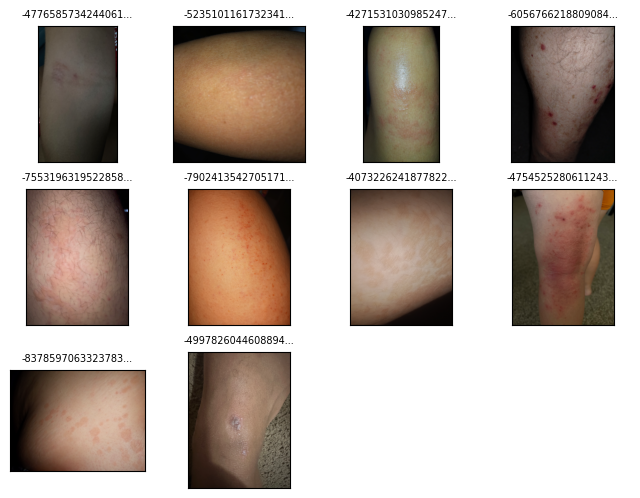

In [22]:
imagelab.visualize(image_files=blurry_image_files[:10])

Most blurry image: /content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-7264099518279915271.png with score: 0.2878783779320334


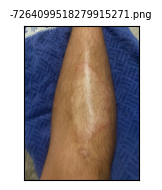

Least blurry image: /content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-4776585734244061924.png with score: 0.14420305263913935


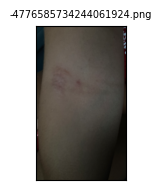

In [28]:
# Find most blurry image (highest score)
most_blurry_file = blurry_images.index[-1]  # filename
most_blurry_score = blurry_images.iloc[-1]["blurry_score"]
print("Most blurry image:", most_blurry_file, "with score:", most_blurry_score)

imagelab.visualize(image_files=[most_blurry_file])  # pass as list

# Find least blurry image (lowest score among flagged)
least_blurry_file = blurry_images.index[0]  # filename
least_blurry_score = blurry_images.iloc[0]["blurry_score"]
print("Least blurry image:", least_blurry_file, "with score:", least_blurry_score)

imagelab.visualize(image_files=[least_blurry_file])  # pass as list


According to the analysis of our dataset, we currently have 57 blurry images, 4 odd size, 1 low_information, and 1 odd_ascpect_ratio image within our dataset.

The most problematic images we may have to remove are the blurry images, but an threshold needs to be established for these images.


### OpenCV


In [ ]:
import os
import cv2
from pathlib import Path

# --- 1) Helper: compute Laplacian variance ---
def blur_score(image):
    """
    Compute Laplacian variance (focus measure).
    Higher variance = sharper, lower = blurrier.
    """
    if image is None:
        return -1.0
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lap = cv2.Laplacian(gray, cv2.CV_64F)
    return float(lap.var())

def scan_all_images(root_dir,
                    exts={".jpg",".jpeg",".png",".bmp",".tif",".tiff",".webp"}):
    results = []
    root = Path(root_dir)
    for p in root.rglob("*"):
        if p.is_file() and p.suffix.lower() in exts:
            img = cv2.imread(str(p))
            var = blur_score(img)
            results.append({"path": str(p), "variance": var})
    results.sort(key=lambda d: d["variance"])
    return results


In [45]:
img_filepath = "/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images"  # change if needed
results = scan_all_images(img_filepath)

print(f"Scanned {len(results)} images")


Scanned 770 images

Top 10 blurriest (lowest variance):
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-3749637390051796787.png  | variance=3.77
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-3495979407017051117.png  | variance=4.57
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-6637063938529970478.png  | variance=5.40
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-3712172422022433576.png  | variance=5.47
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-3678897900470319701.png  | variance=5.54
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-7195700219000080752.png  | variance=5.58
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-3864405960970388084.png  | variance=6.17
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-6198967189233641907.png  | variance=6.31
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-1639533999116789945.png  | variance=6.65
/content/drive/MyDrive/BTT Skinterest 2A/Dataset/images/-34639